In [249]:
import numpy as np
import copy
import random

from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import networkx as nx
from graphviz import Digraph
import pandas as pd

import importlib
import pacman_gym as pg
importlib.reload(pg)

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy, GreedyQPolicy
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent
from rl.callbacks import Callback

import warnings

warnings.filterwarnings('ignore')

from keras.utils import plot_model

# Create a Deep Learning Model with Keras (MAP 1)

In [250]:
env = pg.PacmanEnvironment(rows=4, cols=5, num_ghosts=1, num_pac_dots=1, num_map=1, move_ghost=False)

env.display()



. . . . P 
. . B B B 
G . B . . 
. . D . . 
Récompense : 0




In [171]:
def build_agent(model, actions, gamma, eps_nb_steps):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=0, value_test=.05, nb_steps=eps_nb_steps)
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2, gamma=gamma)
    return dqn

def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + states))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

states = (env.get_num_rows(), env.get_num_cols())
actions = env.get_action_size()

gamma = 0.99
alpha = 0.001
eps_nb_steps = 10000

model = build_model(states, actions)
dqn = build_agent(model, actions, gamma, eps_nb_steps)

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=alpha)
dqn.compile(optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 20)                0         
                                                                 
 dense_82 (Dense)            (None, 64)                1344      
                                                                 
 dense_83 (Dense)            (None, 64)                4160      
                                                                 
 dense_84 (Dense)            (None, 4)                 260       
                                                                 
Total params: 5764 (22.52 KB)
Trainable params: 5764 (22.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [172]:
history = dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 142s 14ms/step - reward: 0.2540
done, took 141.773 seconds


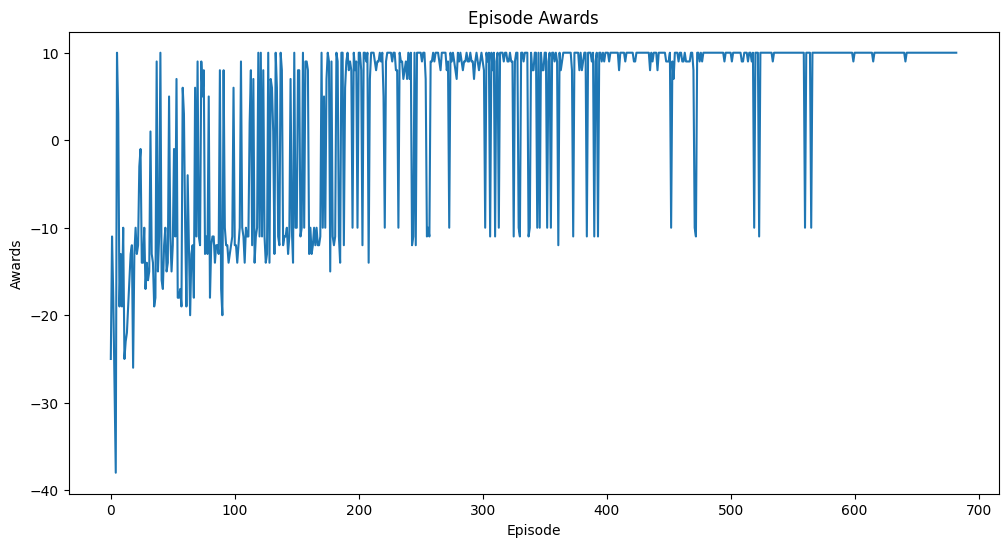

In [268]:
def plot_data(data, title='Graphique des Données', x_label='X-Axis', y_label='Y-Axis', width=10, height=5):
    plt.figure(figsize=(width, height))
    plt.plot(data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

plot_data(history.history['episode_reward'], title='Episode Awards', x_label='Episode', y_label='Awards', width=12, height=6)

# Create a Deep Learning Model with Keras (MAP 2)

# 1 - NO MOOVE GHOST

In [10]:
env2 = pg.PacmanEnvironment(rows=4, cols=5, num_ghosts=1, num_pac_dots=1, num_map=2, move_ghost=False)

env2.display()



. . P . . 
. B B B . 
. . G . . 
. B B B . 
. . . . . 
. . D . . 
Récompense : 0




In [11]:
states = (env2.get_num_rows(), env2.get_num_cols())
actions = env2.get_action_size()

gamma = 0.99
alpha = 0.001
eps_nb_steps = 10000

model = build_model(states, actions)
dqn = build_agent(model, actions, gamma, eps_nb_steps)

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=alpha)
dqn.compile(optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                992       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 4)                 132       
                                                                 
Total params: 2180 (8.52 KB)
Trainable params: 2180 (8.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history2 = dqn.fit(env2, nb_steps=10000, visualize=False, verbose=1)

Training for 10000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 65s 7ms/step - reward: 0.3614
done, took 65.254 seconds


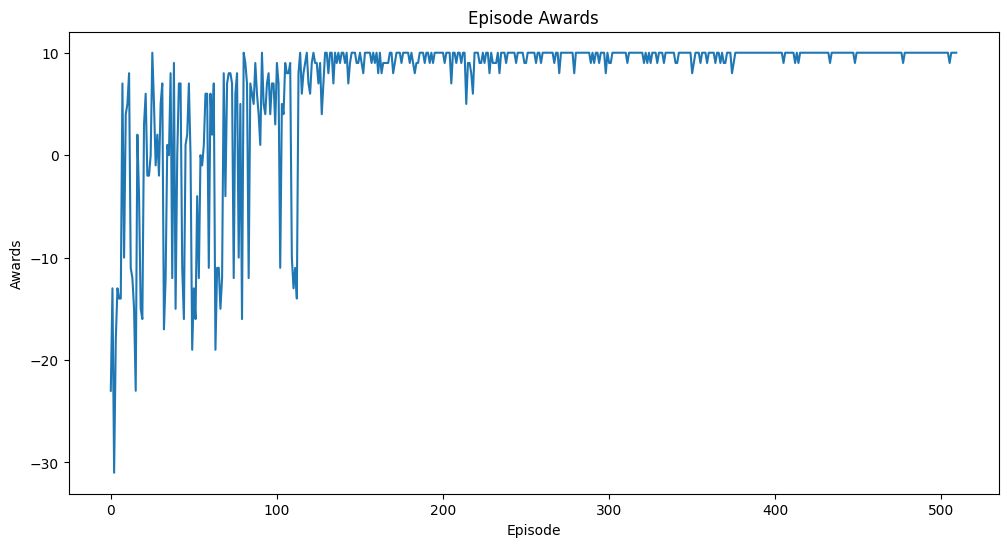

In [16]:
plot_data(history2.history['episode_reward'], title='Episode Awards', x_label='Episode', y_label='Awards', width=12, height=6)

# 2 - MOOVE GHOST

In [18]:
env3 = pg.PacmanEnvironment(rows=4, cols=5, num_ghosts=1, num_pac_dots=1, num_map=2, move_ghost=True)

env3.display()



. . P . . 
. B B B . 
. . G . . 
. B B B . 
. . . . . 
. . D . . 
Récompense : 0




In [222]:
def build_model2(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,) + states, name='Flatted'))
    model.add(Dense(64, activation='relu', name='Dense_1'))
    model.add(Dense(64, activation='relu', name='Dense_2'))
    model.add(Dense(actions, activation='linear', name='Dense_3'))
    return model


In [223]:
states = (env3.get_num_rows(), env3.get_num_cols())
actions = env3.get_action_size()

gamma = 0.99
alpha = 0.001
eps_nb_steps = 20000

model = build_model2(states, actions)
dqn = build_agent(model, actions, gamma, eps_nb_steps)

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=alpha)
dqn.compile(optimizer=optimizer, metrics=['mae'])

model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatted (Flatten)           (None, 30)                0         
                                                                 
 Dense_1 (Dense)             (None, 64)                1984      
                                                                 
 Dense_2 (Dense)             (None, 64)                4160      
                                                                 
 Dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 6404 (25.02 KB)
Trainable params: 6404 (25.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


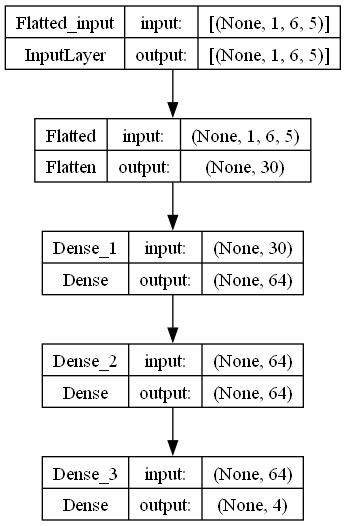

In [224]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Moudjahed/Downloads/bin/'
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [27]:
history3 = dqn.fit(env3, nb_steps=200000, visualize=False, verbose=1)

Training for 200000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -0.2118
195 episodes - episode_reward: -10.862 [-40.000, 10.000] - loss: 0.304 - mae: 7.159 - mean_q: 10.133 - mean_eps: 0.750

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -0.0569
98 episodes - episode_reward: -5.765 [-26.000, 10.000] - loss: 0.605 - mae: 9.300 - mean_q: 13.089 - mean_eps: 0.250

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 65s 7ms/step - reward: -0.0096
26 episodes - episode_reward: -3.731 [-36.000, 10.000] - loss: 0.702 - mae: 10.292 - mean_q: 14.470 - mean_eps: 0.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 67s 7ms/step - reward: -0.0058
10 episodes - episode_reward: -5.700 [-39.000, 9.000] - loss: 0.620 - mae: 10.145 - mean_q: 14.259 - mean_eps: 0.000

Interval 5 (40000 steps performed)
10000/10000 

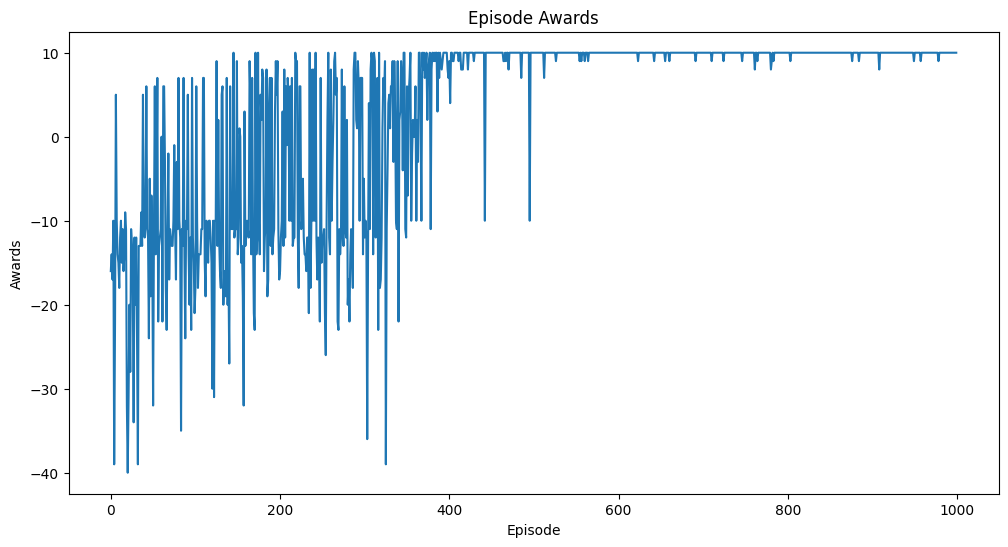

In [40]:
plot_data(history3.history['episode_reward'][:1000], title='Episode Awards', x_label='Episode', y_label='Awards', width=12, height=6)

# ENV4

In [256]:
env4 = pg.PacmanEnvironment(rows=8, cols=10, num_ghosts=2, block_percentage=0,num_pac_dots=1, num_map=3, move_ghost=True)

env4.display()



. . . . . . . . . . 
. P . . . . . . G . 
. . . . . . . . . . 
. . . . . . B B B B 
. . . . D . B . . . 
. . . . . . B . . . 
. . . B B B B . . . 
. . . B . . . . . . 
. G . B . . . . . . 
. . . B . . . . . . 
Récompense : 0




In [257]:
def build_agent(model, nb_actions, gamma, eps_nb_steps):

    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=0, value_test=.05, nb_steps=eps_nb_steps)

    memory = SequentialMemory(limit=100000, window_length=1)

    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                   nb_actions=nb_actions, nb_steps_warmup=1000, 
                   target_model_update=1e-2, gamma=gamma)

    return dqn

In [258]:
states = (env4.get_num_rows(), env4.get_num_cols())
actions = env4.get_action_size()

gamma = 0.99
alpha = 0.001
eps_nb_steps = 20000

model = build_model2(states, actions)
dqn = build_agent(model, actions, gamma, eps_nb_steps)

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=alpha)
dqn.compile(optimizer=optimizer, metrics=['mae'])

model.summary()

#model.save('model-rl.h5')

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatted (Flatten)           (None, 100)               0         
                                                                 
 Dense_1 (Dense)             (None, 64)                6464      
                                                                 
 Dense_2 (Dense)             (None, 64)                4160      
                                                                 
 Dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10884 (42.52 KB)
Trainable params: 10884 (42.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [259]:
history4 = dqn.fit(env4, nb_steps=250000, visualize=False, verbose=1)

Training for 250000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 99s 10ms/step - reward: -0.1289
218 episodes - episode_reward: -5.913 [-24.000, 10.000] - loss: 3.049 - mae: 9.659 - mean_q: 13.509 - mean_eps: 0.725

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 110s 11ms/step - reward: -0.1304
170 episodes - episode_reward: -7.653 [-19.000, 10.000] - loss: 6.392 - mae: 17.954 - mean_q: 24.748 - mean_eps: 0.250

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 118s 12ms/step - reward: -0.1336
152 episodes - episode_reward: -8.809 [-18.000, 10.000] - loss: 4.122 - mae: 13.948 - mean_q: 19.331 - mean_eps: 0.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 124s 12ms/step - reward: -0.1367
177 episodes - episode_reward: -7.723 [-20.000, 10.000] - loss: 2.118 - mae: 8.090 - mean_q: 11.217 - mean_eps: 0.000

Interval 5 (40000 steps performed)
10

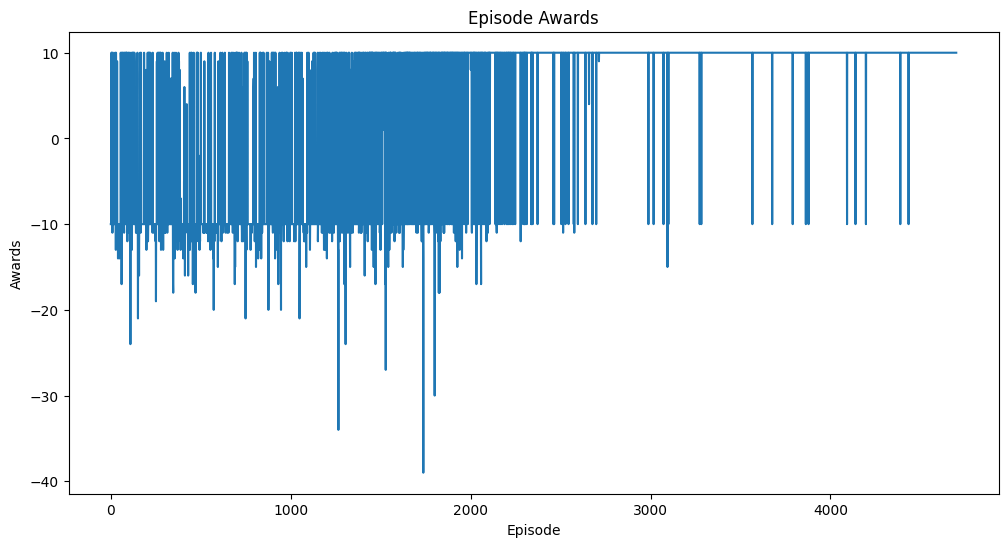

In [267]:
plot_data(history4.history['episode_reward'][:4700], title='Episode Awards', x_label='Episode', y_label='Awards', width=12, height=6)